In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
import csv

raw_train_data = []
raw_train_labels = []

with open('/data/spooky_author/train_ascii.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for lid, text, author in reader:
        raw_train_data.append(text)
        raw_train_labels.append(author)

#### Convert data

In [4]:
chars = ['@'] + sorted(list(set(''.join(raw_train_data))))

In [5]:
print(''.join(chars))
vocab_size = len(chars)
print(vocab_size)

@ "',.:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
61


In [6]:
line_lens = list(map(lambda x: len(x), raw_train_data))

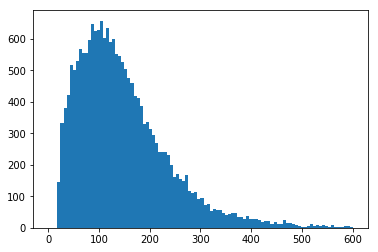

In [7]:
d = plt.hist(line_lens, bins=100, range=(0, 600))

In [8]:
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

In [9]:
max_len = 400

In [10]:
tdata = np.array([[char_indices[c] for c in '@'*max_len+text][-max_len:] for text in raw_train_data])

In [11]:
tdata.shape

(19579, 400)

#### Convert labels

In [12]:
authors = sorted(list(set(raw_train_labels)))

In [13]:
author_indices = dict((a, i) for i, a in enumerate(authors))
indices_autor = dict((i, a) for i, a in enumerate(authors))

In [14]:
tlabels = to_categorical(list(map(lambda l: author_indices[l], raw_train_labels)))

In [15]:
number_of_classes = len(authors)

In [16]:
number_of_classes

3

## Split data to train and validation

In [17]:
from sklearn.model_selection import train_test_split

train_data, valid_data, train_labels, valid_labels  = train_test_split(tdata, tlabels, test_size=0.05)

In [18]:
print(train_data.shape, valid_data.shape, train_labels.shape, valid_labels.shape)

(18600, 400) (979, 400) (18600, 3) (979, 3)


## Build model 

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Nadam

n_fac = 32 
bs = 64
n_hidden=32

model=Sequential([
        Embedding(vocab_size, n_fac, batch_input_shape=(None,max_len)),
        BatchNormalization(),
        LSTM(n_hidden, input_shape=(None,n_fac),return_sequences=True),
        LSTM(n_hidden),
        Dense(number_of_classes, activation='softmax')
    ])



In [27]:
model.compile(loss='categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'])

In [28]:
model.fit(train_data, train_labels, validation_data=(valid_data, valid_labels), batch_size=bs)

Train on 18600 samples, validate on 979 samples
Epoch 1/10
18600/18600 [==============================] - ETA: 0s - loss: 1.0996 - acc: 0.3997 - val_loss: 1.0830 - val_acc: 0.4198
Epoch 2/10
 2368/18600 [==>...........................] - ETA: 288s - loss: 1.0883 - acc: 0.4046

KeyboardInterrupt: 